**Joanna Mielniczuk** \
Metody planowania i analizy eksperymentów \
Zadanie domowe nr 1

# Dane

Analizie poddano dane pochodzące ze strony gov.pl, zawierające
informacje o dziennym przebiegu epidemii koronawirusa w Polsce z okresu maj - lipiec 2020 roku

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
!pip install odfpy

In [ ]:
# na potrzeby importu zostały wystawione na moim Githubie
url = 'https://github.com/asikson/Stuff/blob/main/zaka%C5%BCenia_maj-lip.ods?raw=true'
data = pd.read_excel(url, header=None, engine='odf')
data.columns = ['Data', 'Nowe przypadki', 'Przypadki (kumulatywnie)', 'Zgony', 
                   'Zgony kumulatywnie', 'Ozdrowieńcy', 'Ozdrowieńcy kumulatywnie',
                   'Aktywne przypadki', 'Kwarantanna', 'Nadzór']
data

,Data,Nowe przypadki,Przypadki (kumulatywnie),Zgony,Zgony kumulatywnie,Ozdrowieńcy,Ozdrowieńcy kumulatywnie,Aktywne przypadki,Kwarantanna,Nadzór
0,01.05.2020,228,13105,7,649,271,3762,8694,95625,18383
1,02.05.2020,270,13375,12,661,183,3945,8769,96612,18306
2,03.05.2020,318,13693,15,676,150,4095,8922,96699,17785
3,04.05.2020,313,14006,19,695,185,4280,9031,100765,17291
4,05.05.2020,425,14431,19,714,375,4655,9062,101395,17081
...,...,...,...,...,...,...,...,...,...,...
87,27.07.2020,337,43402,5,1676,187,33043,8683,94920,7245
88,28.07.2020,502,43904,6,1682,147,33190,9032,95453,6222
89,29.07.2020,512,44416,12,1694,453,33643,9079,97561,8094
90,30.07.2020,615,45031,15,1709,344,33987,9335,97189,8069


# Podstawowa statystyka

In [ ]:
def basicStat(column):
    print('Minimum: ', column.min(), ' Maksimum: ', column.max(), ' Średnia: ', round(column.mean(), 2), ' Odchylenie standardowe: ', round(column.std(), 2))

In [ ]:
toAnalyze = ['Nowe przypadki', 'Przypadki (kumulatywnie)', 'Zgony', 
                'Zgony kumulatywnie', 'Ozdrowieńcy', 'Ozdrowieńcy kumulatywnie',
                'Aktywne przypadki', 'Kwarantanna', 'Nadzór']

In [ ]:
for name in toAnalyze:
    print(name)
    basicStat(data[name])
    print()

Nowe przypadki
Minimum:  193  Maksimum:  657  Średnia:  356.64  Odchylenie standardowe:  99.21

Przypadki (kumulatywnie)
Minimum:  13105  Maksimum:  45688  Średnia:  29164.24  Odchylenie standardowe:  9298.24

Zgony
Minimum:  2  Maksimum:  30  Średnia:  11.67  Odchylenie standardowe:  6.23

Zgony kumulatywnie
Minimum:  649  Maksimum:  1716  Średnia:  1252.17  Odchylenie standardowe:  314.72

Ozdrowieńcy
Minimum:  82  Maksimum:  754  Średnia:  335.68  Odchylenie standardowe:  155.72

Ozdrowieńcy kumulatywnie
Minimum:  3762  Maksimum:  34374  Średnia:  17383.41  Odchylenie standardowe:  9418.23

Aktywne przypadki
Minimum:  7837  Maksimum:  14099  Średnia:  10528.65  Odchylenie standardowe:  1814.76

Kwarantanna
Minimum:  76645  Maksimum:  104024  Średnia:  88849.66  Odchylenie standardowe:  7244.12

Nadzór
Minimum:  6222  Maksimum:  20079  Średnia:  15324.05  Odchylenie standardowe:  4298.8



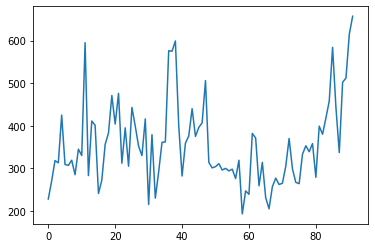

In [ ]:
data['Nowe przypadki'].plot.line()

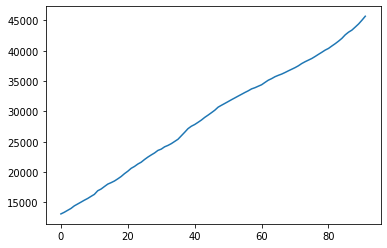

In [ ]:
data['Przypadki (kumulatywnie)'].plot.line()

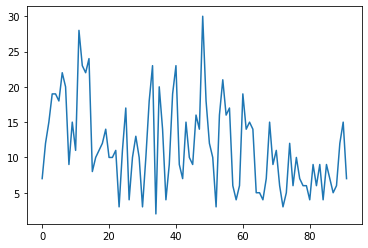

In [ ]:
data['Zgony'].plot.line()

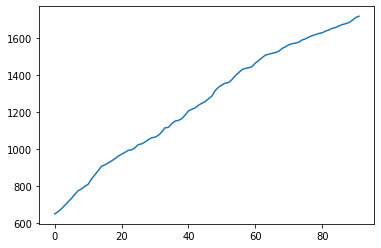

In [ ]:
data['Zgony kumulatywnie'].plot.line()

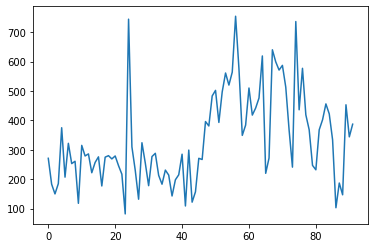

In [ ]:
data['Ozdrowieńcy'].plot.line()

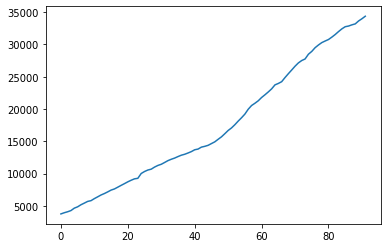

In [ ]:
data['Ozdrowieńcy kumulatywnie'].plot.line()

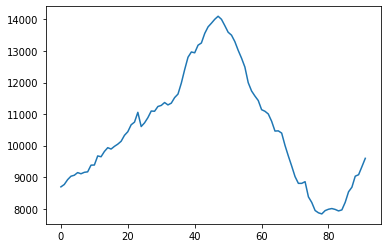

In [ ]:
data['Aktywne przypadki'].plot.line()

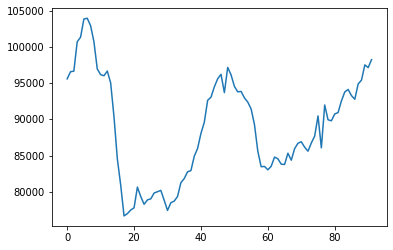

In [ ]:
data['Kwarantanna'].plot.line()

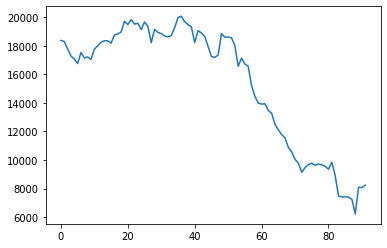

In [ ]:
data['Nadzór'].plot.line()

# Grupowanie po miesiącu

In [ ]:
dataToGroup = data[['Nowe przypadki', 'Zgony', 'Ozdrowieńcy',
            'Aktywne przypadki', 'Kwarantanna', 'Nadzór']]

months = data['Data'].apply(lambda d: (dt.datetime.strptime(d, "%d.%m.%Y")).month)
dataToGroup['Miesiąc'] = months
dataToGroup

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Nowe przypadki,Zgony,Ozdrowieńcy,Aktywne przypadki,Kwarantanna,Nadzór,Miesiąc
0,228,7,271,8694,95625,18383,5
1,270,12,183,8769,96612,18306,5
2,318,15,150,8922,96699,17785,5
3,313,19,185,9031,100765,17291,5
4,425,19,375,9062,101395,17081,5
...,...,...,...,...,...,...,...
87,337,5,187,8683,94920,7245,7
88,502,6,147,9032,95453,6222,7
89,512,12,453,9079,97561,8094,7
90,615,15,344,9335,97189,8069,7


In [ ]:
monthSums = dataToGroup.groupby('Miesiąc').sum()
monthSums

,Nowe przypadki,Zgony,Ozdrowieńcy,Aktywne przypadki,Kwarantanna,Nadzór
Miesiąc,,,,,,
5,10909,421,7958,309091,2740885,571684
6,10607,400,10342,380329,2657180,535877
7,11295,253,12583,279216,2776104,302252


In [ ]:
monthAvg = dataToGroup.groupby('Miesiąc').mean().apply(lambda v: round(v, 2))
monthAvg

,Nowe przypadki,Zgony,Ozdrowieńcy,Aktywne przypadki,Kwarantanna,Nadzór
Miesiąc,,,,,,
5,351.90,13.58,256.71,9970.68,88415.65,18441.42
6,353.57,13.33,344.73,12677.63,88572.67,17862.57
7,364.35,8.16,405.90,9006.97,89551.74,9750.06


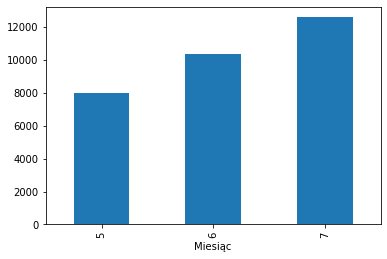

In [ ]:
monthSums['Ozdrowieńcy'].plot.bar()

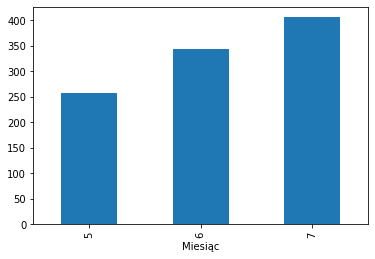

In [ ]:
monthAvg['Ozdrowieńcy'].plot.bar()

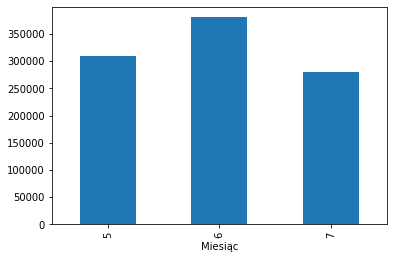

In [ ]:
monthSums['Aktywne przypadki'].plot.bar()

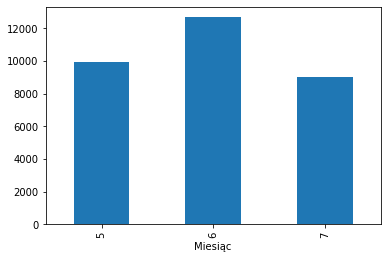

In [ ]:
monthAvg['Aktywne przypadki'].plot.bar()

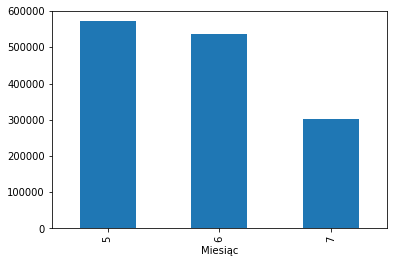

In [ ]:
monthSums['Nadzór'].plot.bar()

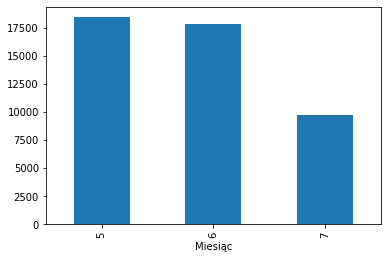

In [ ]:
monthAvg['Nadzór'].plot.bar()